In [ ]:
########################################
#getting system arguments
import sys
def GetArg_dataName(default="Variables"):
    """
    Safely retrieve dataName from sys.argv.
    #Run One: python Tracked_Profiles.py Variables
    #Run Two: python Tracked_Profiles.py Entrainment
    #Run Three: python Tracked_Profiles.py PROCESSED_Entrainment
    #Run Four: python Tracked_Profiles.py W_Budgets
    #Run Five: python Tracked_Profiles.py QV_Budgets
    #Run Six: python Tracked_Profiles.py TH_Budgets
    """
    # If run inside Jupyter, sys.argv will include ipykernel arguments
    if any("ipykernel_launcher" in arg for arg in sys.argv):
        print(f"Using default dataName: {default}")
        return default

    # If a user-specified argument exists, use it
    if len(sys.argv) > 1:
        out=sys.argv[1]
        print(f"Using argument dataName: {out}")
        return out

    return default

dataName = GetArg_dataName()

In [454]:
####################################
#ENVIRONMENT SETUP

In [455]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import xarray as xr

import sys; import os; import time; from datetime import timedelta
import pickle
import h5py
from tqdm import tqdm

In [456]:
#MAIN DIRECTORIES
def GetDirectories():
    mainDirectory='/mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/'
    mainCodeDirectory=os.path.join(mainDirectory,"Code/CodeFiles/")
    scratchDirectory='/mnt/lustre/koa/scratch/air673/'
    codeDirectory=os.getcwd()
    return mainDirectory,mainCodeDirectory,scratchDirectory,codeDirectory

[mainDirectory,mainCodeDirectory,scratchDirectory,codeDirectory] = GetDirectories()

In [728]:
def GetPlottingDirectory(plotFileName, plotType):
    plottingDirectory = mainCodeDirectory=os.path.join(mainDirectory,"Code","PLOTTING")
    
    specificPlottingDirectory = os.path.join(plottingDirectory, plotType, 
                                             f"{ModelData.res}_{ModelData.t_res}_{ModelData.Nz_str}nz")
    os.makedirs(specificPlottingDirectory, exist_ok=True)

    plottingFileName=os.path.join(specificPlottingDirectory, plotFileName)

    return plottingFileName

def SaveFigure(fig,plotType, fileName):
    plotFileName = f"{fileName}_{ModelData.res}_{ModelData.t_res}_{ModelData.Np_str}.jpg"
    plottingFileName = GetPlottingDirectory(plotFileName, plotType)
    print(f"Saving figure to {plottingFileName}")
    fig.savefig(plottingFileName, dpi=300, bbox_inches='tight')

In [457]:
#IMPORT CLASSES
sys.path.append(os.path.join(mainCodeDirectory,"2_Variable_Calculation"))
from CLASSES_Variable_Calculation import ModelData_Class, SlurmJobArray_Class, DataManager_Class

In [458]:
#IMPORT FUNCTIONS
sys.path.append(os.path.join(mainCodeDirectory,"2_Variable_Calculation"))
import FUNCTIONS_Variable_Calculation
from FUNCTIONS_Variable_Calculation import *

In [459]:
#data loading class
ModelData = ModelData_Class(mainDirectory, scratchDirectory, simulationNumber=1)
#data manager class
DataManager = DataManager_Class(mainDirectory, scratchDirectory, ModelData.res, ModelData.t_res, ModelData.Nz_str,
                                ModelData.Np_str, dataType="Tracking_Algorithms", dataName="Lagrangian_UpdraftTracking",
                                dtype='float32',codeSection = "Project_Algorithms")

=== CM1 Data Summary ===
 Simulation #:   1
 Resolution:     1km
 Time step:      5min
 Vertical levels:34
 Parcels:        1e6
 Data file:      /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Model/cm1r20.3/run/cm1out_1km_5min_34nz.nc
 Parcel file:    /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Model/cm1r20.3/run/cm1out_pdata_1km_5min_1e6np.nc
 Time steps:     133

=== DataManager Summary ===
 inputDirectory #:   /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/OUTPUT/Variable_Calculation/TimeSplitModelData
 outputDirectory #:   /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/OUTPUT/Project_Algorithms/Tracking_Algorithms
 inputDataDirectory #:   /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/OUTPUT/Variable_Calculation/TimeSplitModelData/1km_5min_34nz/ModelData
 inputParcelDirectory #:   /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/D

In [460]:
#data manager class (for saving data)
DataManager_TrackedProfiles = DataManager_Class(mainDirectory, scratchDirectory, ModelData.res, ModelData.t_res, ModelData.Nz_str,
                                ModelData.Np_str, dataType="Tracked_Profiles", dataName="Tracked_Profiles",
                                dtype='float32',codeSection = "Project_Algorithms")

=== DataManager Summary ===
 inputDirectory #:   /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/OUTPUT/Variable_Calculation/TimeSplitModelData
 outputDirectory #:   /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/OUTPUT/Project_Algorithms/Tracked_Profiles
 inputDataDirectory #:   /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/OUTPUT/Variable_Calculation/TimeSplitModelData/1km_5min_34nz/ModelData
 inputParcelDirectory #:   /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/OUTPUT/Variable_Calculation/TimeSplitModelData/1km_5min_34nz/ParcelData
 outputDataDirectory #:   /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/OUTPUT/Project_Algorithms/Tracked_Profiles/1km_5min_34nz/Tracked_Profiles



In [461]:
#IMPORT CLASSES
sys.path.append(os.path.join(mainCodeDirectory,"3_Project_Algorithms","2_Tracking_Algorithms"))
from CLASSES_TrackingAlgorithms import TrackingAlgorithms_DataLoading_Class, Results_InputOutput_Class, TrackedParcel_Loading_Class

In [462]:
# IMPORT CLASSES
sys.path.append(os.path.join(mainCodeDirectory,"3_Project_Algorithms","3_Tracked_Profiles"))
from CLASSES_TrackedProfiles import TrackedProfiles_DataLoading_CLASS

In [463]:
##############################################
#SETUP

In [464]:
import sys
path=os.path.join(mainCodeDirectory,'Functions/')
sys.path.append(path)

import NumericalFunctions
from NumericalFunctions import * # import NumericalFunctions 
import PlottingFunctions
from PlottingFunctions import * # import PlottingFunctions

# # Get all functions in NumericalFunctions
# import inspect
# functions = [f[0] for f in inspect.getmembers(NumericalFunctions, inspect.isfunction)]
# functions

#####

#Import StatisticalFunctions 
import sys
dir2='/mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/'
path=dir2+'Functions/'
sys.path.append(path)

import StatisticalFunctions
from StatisticalFunctions import * # import NumericalFunctions 

In [465]:
##############################################
#DATA LOADING FUNCTIONS

In [466]:
def MakeDataDictionary(variableNames,t,printstatement=False):
    timeString = ModelData.timeStrings[t]
    # print(f"Getting data from {timeString}","\n")
    
    dataDictionary = {variableName: CallLagrangianArray(ModelData, DataManager, timeString, variableName=variableName, printstatement=printstatement) 
                      for variableName in variableNames}      
    return dataDictionary
    
def GetSpatialData(t):    
    variableNames = ['Z']
    dataDictionary = MakeDataDictionary(variableNames,t)
    [Z] = (dataDictionary[k] for k in variableNames)
    return Z

In [467]:
def ExtractProfileStandardErrorArrays(profileDict):
    """
    From a nested dictionary like trackedProfileArrays, compute standard error arrays
    using ProfileStandardError(profile_array, profile_array_squares) for each variable,
    and return a new dictionary with the same structure, but only 'profile_array_SE'.
    """
    output = {}

    for category, depth_dict in profileDict.items():
        output[category] = {}

        for depth, var_dict in depth_dict.items():
            output[category][depth] = {}

            for varName, arrays in var_dict.items():
                profile     = arrays.get("profile_array")
                profile_sq  = arrays.get("profile_array_squares")

                if profile is not None and profile_sq is not None:
                    profile_SE = ProfileStandardError(profile, profile_sq)
                    output[category][depth][varName] = {
                        "profile_array_SE": profile_SE
                    }

    return output

In [468]:
##############################################
#DATA LOADING

In [469]:
#Loading in Tracked Parcels Info
trackedArrays,LevelsDictionary = TrackedParcel_Loading_Class.LoadingSubsetParcelData(ModelData,DataManager,
                                                         Results_InputOutput_Class)


CL: ALL=12239, SHALLOW=8532, DEEP=1349
nonCL: ALL=10043, SHALLOW=7684, DEEP=1113
SBF: ALL=1905, SHALLOW=961, DEEP=489
ColdPool: ALL=10334, SHALLOW=7571, DEEP=860
Mean Cloudbase is: 1.45 km

Min Cloudbase is: 1.25 km

Mean LFC is: 1.93 km

Mean LCL is: 1.79 km

Min LFC is: 1.45 km

Min LCL is: 1.37 km



In [470]:
trackedProfileArrays = TrackedProfiles_DataLoading_CLASS.LoadProfile(ModelData,DataManager_TrackedProfiles, dataName, t='combined')

In [471]:
trackedProfiles_SE = ExtractProfileStandardErrorArrays(trackedProfileArrays)

In [472]:
##############################################
#PLOTTING FUNCTIONS

In [473]:
def PlotAveragedProfile(averagedProfile): #*#* axis
    a=averagedProfile[:,0]
    b=averagedProfile[:,1]
    plt.plot(a,b)

def PlotSE(axis, profile, SE_profile, color, multiplier=1, switch=1, alpha=0.1, min_value=None):
    lower = multiplier * profile[:, 0] - multiplier * SE_profile[:, 0] * switch
    upper = multiplier * profile[:, 0] + multiplier * SE_profile[:, 0] * switch
    
    if min_value is not None:
        lower = np.maximum(lower, min_value)
    axis.fill_betweenx(profile[:, -1], lower, upper, color=color, alpha=alpha)

In [474]:
def GethLines(LevelsDictionary):
    hLine_1 = LevelsDictionary["min_all_cloudbase"]
    hLine_2 = LevelsDictionary["MeanLFC"]

    hLines = (hLine_1,hLine_2)
    hLineColors = ("purple","#FF8C00")
    return hLines,hLineColors
hLines,hLineColors = GethLines(LevelsDictionary)

def PlotHLines(axis,hLines,hLineColors):
    for (hLine,hLineColor) in zip(hLines,hLineColors):
        axis.axhline(hLine, color=hLineColor, linestyle='dashed', zorder=-10)

In [475]:
def ApplyXLimFromZLim(axis, zlim, buffer=0.05):
    """
    Adjust the x-limits of the axis by examining all lines plotted on it.
    Only considers x-values where y is within the zlim range.
    """
    x_all = []
    y_all = []

    for line in axis.get_lines():
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        x_all.append(xdata)
        y_all.append(ydata)

    if not x_all or not y_all:
        return  # No lines to process

    x_all = np.concatenate(x_all)
    y_all = np.concatenate(y_all)

    mask = (y_all >= zlim[0]) & (y_all <= zlim[1])
    if np.any(mask):
        xmin = np.min(x_all[mask])
        xmax = np.max(x_all[mask])
        delta = xmax - xmin if xmax > xmin else xmax * buffer
        axis.set_xlim(xmin - delta * buffer, xmax + delta * buffer)

    axis.set_ylim(zlim)

In [476]:
from matplotlib.lines import Line2D
def AddCategoryLegend(fig, parcelTypes=["CL", "nonCL", "SBF"], loc='upper center', bbox=(0.5, 0.93)):
    """
    Adds a custom legend for parcel types based on linestyle (e.g., CL, nonCL, SBF).
    """
    linestyle_map = {
        "CL": "solid",
        "nonCL": "dashed",
        "SBF": "dashdot"
    }

    custom_lines = [
        Line2D([0], [0], color='black', linestyle=linestyle_map[ptype],
               linewidth=1.5, label=ptype)
        for ptype in parcelTypes if ptype in linestyle_map
    ]

    fig.legend(
        handles=custom_lines,
        loc=loc,
        ncol=len(custom_lines),
        fontsize=10,
        title='Parcel Types',
        title_fontsize=12,
        bbox_to_anchor=bbox,
        borderaxespad=0,
        frameon=True
    )

def AddDepthLegend(axis, depths=["ALL", "SHALLOW", "DEEP"]):
    """
    Adds a legend to a specific axis for cloud depth categories (color-coded).
    """
    color_map = {
        "ALL": "black",
        "SHALLOW": "green",
        "DEEP": "blue"
    }

    legend_lines = [
        Line2D([0], [0], color=color_map[d], linestyle='solid',
               linewidth=2, label=d)
        for d in depths if d in color_map
    ]

    axis.legend(
        handles=legend_lines,
        loc='upper right',
        title='Cloud Types',
        title_fontsize=10,
        fontsize=9,
        frameon=True
    )

In [708]:
def ExtraSingleAxisModifications(variableName, axis):
    if variableName in ['W',"VMF_g","VMF_c","HMC"]:
        axis.axvline(0,color='gray',linestyle='dashed',zorder=-15)
    if variableName in ['HMC']:
        apply_scientific_notation([axis],decimals=2)

def ExtraAllAxisModifications(axes,variableNames):

    #matching W and VMF x axises
    index1=variableNames.index('W')
    index2=variableNames.index('VMF_g')
    MatchAxisLimits([axes[index1], axes[index2]], dim='x')

    index=variableNames.index('QCQI')
    axes[index].set_xlim(left=0)

    #RH_vapor xlim max 100%
    index=variableNames.index('RH_vapor')
    axes[index].set_xlim(right=100)

    #snap axises to limits
    SnapLimitsToTicks(axes, dim='x')



In [709]:
variableNames

['QV', 'QCQI', 'RH_vapor', 'W', 'VMF_g', 'HMC', 'THETA_v', 'THETA_e', 'MSE']

In [721]:
# === Category and depth styles ===
category_styles = {"CL": "solid", "nonCL": "dashed", "SBF": "dashdot"}
depth_colors = {"SHALLOW": "green", "DEEP": "blue"}

# === Level 3: Plot one line ===
def PlotProfileLine(axis, profile, SE_profile, parcelType, parcelDepth, multiplier=1):
    avg = ProfileMean(profile)
    x = multiplier * avg[:, 0]
    y = avg[:, 1]

    color = depth_colors.get(parcelDepth, "gray")
    linestyle = category_styles.get(parcelType, "solid")
    label = f"{parcelType}-{parcelDepth}"

    # Plot main line
    axis.plot(x, y, color=color, linestyle=linestyle, linewidth=1, label=label)

    # Plot SE band
    if SE_profile is not None:
        PlotSE(axis, avg, SE_profile, color=color, multiplier=multiplier)

# === Level 2: Plot all depths for a given parcelType ===
def PlotAllDepths(axis, profiles, profilesSE, parcelType, variableName, parcelDepths, multiplier=1, zlim=(0,6)):
    for parcelDepth in parcelDepths:
        profile = profiles[parcelType][parcelDepth][variableName]["profile_array"]
        SE_profile = None
        if profilesSE:
            SE_profile = profilesSE[parcelType][parcelDepth][variableName].get("profile_array_SE")
        PlotProfileLine(axis, profile, SE_profile, parcelType, parcelDepth, multiplier=multiplier)

    ApplyXLimFromZLim(axis, zlim)
        
# === Level 1: Plot one variable to a single axis ===
def PlotSingleVariable(axis, profiles, profilesSE, variableName, variableInfo,
                       parcelTypes, parcelDepths):
    label = variableInfo[variableName]["label"]
    units = variableInfo[variableName]["units"]
    multiplier = variableInfo[variableName].get("multiplier", 1)

    for parcelType in parcelTypes:
        
        PlotAllDepths(axis, profiles, profilesSE, parcelType, variableName, parcelDepths, multiplier=multiplier)
        if variableName in ['VMF_g']:
            PlotAllDepths(axis, profiles, profilesSE, parcelType, "VMF_c", parcelDepths, multiplier=multiplier)

    axis.set_ylabel("Height (km)")
    axis.set_xlabel(f"{label} {units}")
    axis.grid(True, linestyle="--", alpha=0.4)
    PlotHLines(axis, hLines, hLineColors)

def PlotAllVariables(profiles, profilesSE, variableNames, variableInfo,
                     parcelTypes, parcelDepths, ncols=3, figsize=(15, 12)):
    import matplotlib.gridspec as gridspec

    n_vars = len(variableNames)
    nrows = int(np.ceil(n_vars / ncols))

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nrows, ncols, figure=fig, wspace=0.2, hspace=0.35)

    axes = [fig.add_subplot(gs[i // ncols, i % ncols]) for i in range(n_vars)]

    for i, var in enumerate(variableNames):
        axis = axes[i]
        PlotSingleVariable(axis, profiles, profilesSE, var, variableInfo, parcelTypes, parcelDepths)
        ExtraSingleAxisModifications(var, axis)

    # Turn off unused axes (if any)
    for j in range(len(variableNames), nrows * ncols):
        fig.add_subplot(gs[j // ncols, j % ncols]).axis("off")

    AddCategoryLegend(fig, parcelTypes)
    AddDepthLegend(axes[0])

    ExtraAllAxisModifications(axes,variableNames)

    return fig


In [722]:
##############################################
#PLOTTING SETUP

In [723]:
variableInfo = {
    "QV": {
        "label": r"$q_v$",
        "units": r"($g\ kg^{-1}$)",
        "multiplier": 1e3
    }, 
    "QCQI": {
        "label": r"$q_c+q_i$",
        "units": r"($g\ kg^{-1}$)",
        "multiplier": 1e3
    }, 
    "RH_vapor": {
        "label": r"$RH_v$",
        "units": "(%)",
        "multiplier": 1e2
    }, 
    "W": {
        "label": "w",
        "units": r"($m\ s^{-1}$)",
        "multiplier": 1
    },
    "VMF_g": {
        "label": r"$VMF$",
        "units": r"($kg\ m^{-2}\ s^{-1}$)",
        "multiplier": 1
    },
    "HMC": {
        "label": "HMC",
        "units": r"($g\ kg^{-1}\ s^{-1}$)",
        "multiplier": 1e3
    },    
    "THETA_v": {
        "label": r"$\theta_v$",
        "units": "(K)",
        "multiplier": 1
    },
    "THETA_e": {
        "label": r"$\theta_e$",
        "units": "(K)",
        "multiplier": 1
    },
    "MSE": {
        "label": r"$\theta_v$",
        "units": "(K)",
        "multiplier": 1/1005.7
    }
}

In [724]:
##############################################
#PLOTTING

In [726]:
variableNames = ["QV", "QCQI","RH_vapor","W","VMF_g", "HMC","THETA_v","THETA_e","MSE"]

Saving figure to /mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/PLOTTING/Project_Algorithms/Tracked_Profiles/Tracked_Profiles_Variables/1km_5min_34nz/Tracked_Profiles_Variables_1km_5min_1e6.jpg


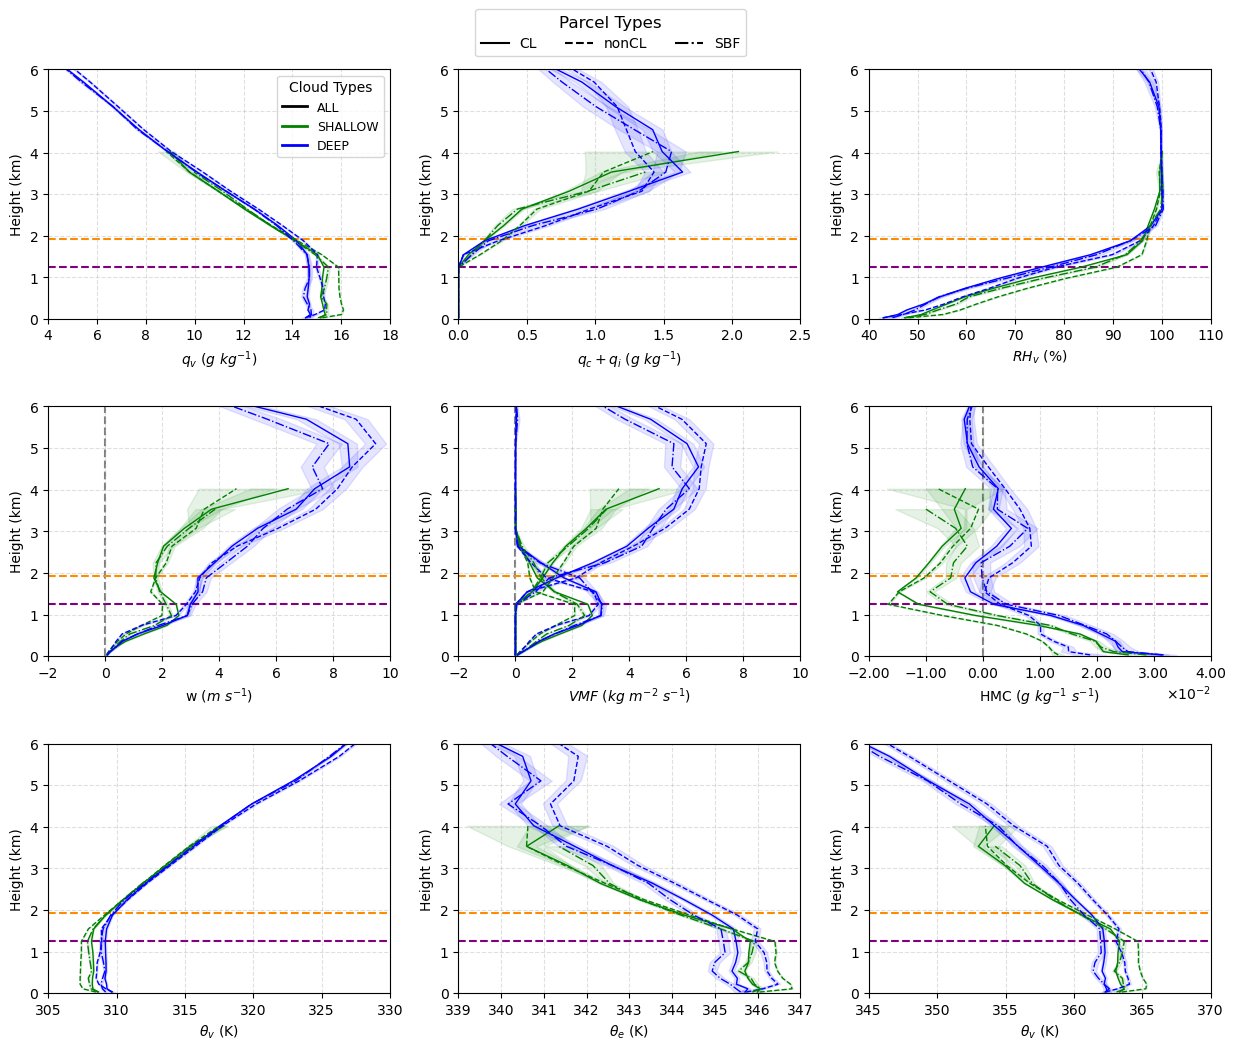

In [729]:
fig = PlotAllVariables(
    profiles=trackedProfileArrays,
    profilesSE=trackedProfiles_SE,
    variableNames=variableNames,
    variableInfo=variableInfo,
    parcelTypes=["CL", "nonCL", "SBF"],
    parcelDepths=["SHALLOW", "DEEP"]
)

#saving
fileName=f"Tracked_Profiles_Variables" 
SaveFigure(fig,plotType="Project_Algorithms/Tracked_Profiles/Tracked_Profiles_Variables",fileName=fileName)